In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [69]:
df = pd.read_csv("../cluster/mall_customers-cluster.csv")
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [70]:
df_cleaned = df.dropna()
df_cleaned = df_cleaned.drop_duplicates()
print(f"Original shape: {df.shape}")
print(f"Cleaned shape: {df_cleaned.shape}")

Original shape: (200, 5)
Cleaned shape: (200, 5)


/var/folders/xn/nlz9z9sn7k92r98bkxjc8h1w0000gn/T/ipykernel_6067/2329768257.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Gender', palette='Set2')


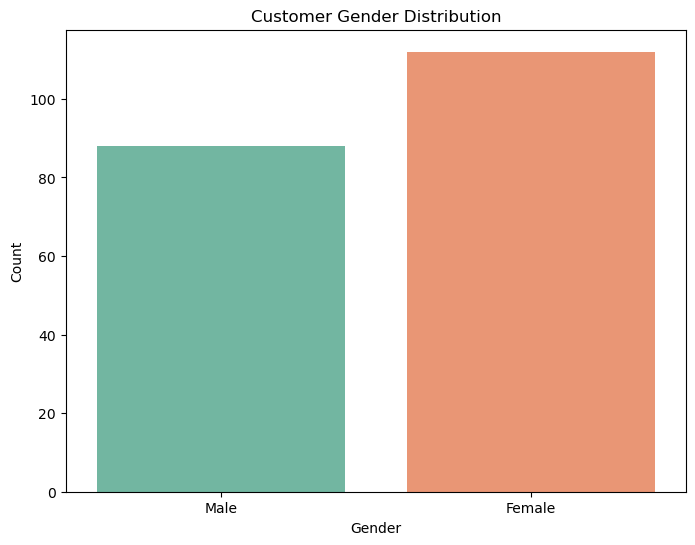

In [71]:
# Gender distribution 
plt.figure(figsize=(8, 6))
sns.countplot(data=df_cleaned, x='Gender', palette='Set2')
plt.title("Customer Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

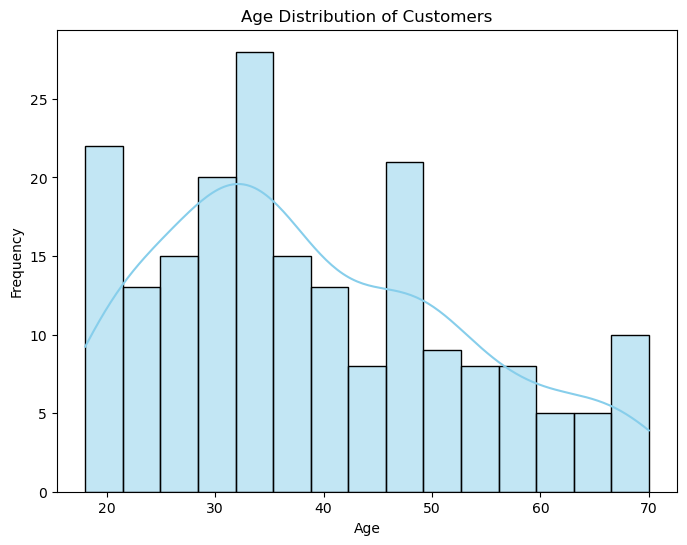

In [72]:
# Age Distribution 
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['Age'], kde=True, color='skyblue', bins=15)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

/var/folders/xn/nlz9z9sn7k92r98bkxjc8h1w0000gn/T/ipykernel_6067/3343838677.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='Gender', y='Spending Score (1-100)', palette='Set2')


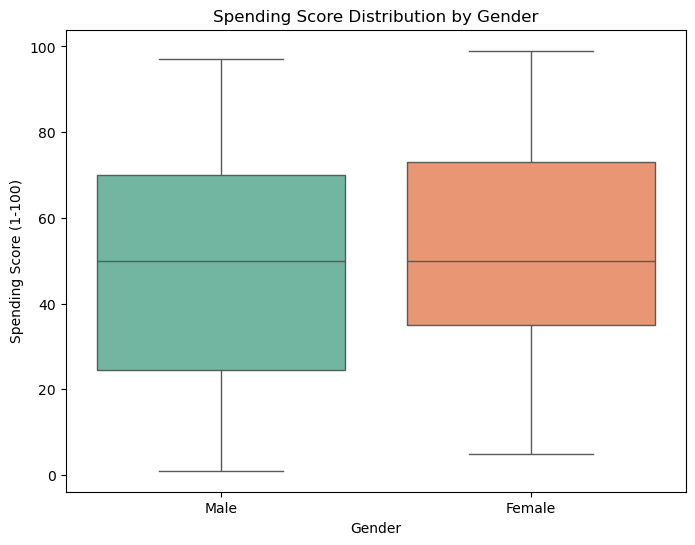

In [73]:
# Spending score by gender
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_cleaned, x='Gender', y='Spending Score (1-100)', palette='Set2')
plt.title("Spending Score Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Spending Score (1-100)")
plt.show()

In [74]:
# Select relevant features for clustering
features = df_cleaned[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features (scaling to make each feature contribute equally)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

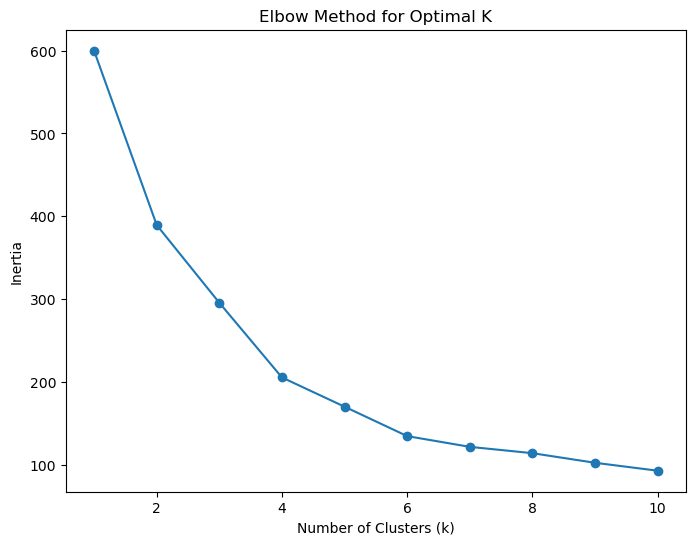

In [75]:
# Different values of k (number of clusters)
inertia = []
k_range = range(1, 11)  # Try k values from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()


In [76]:
# Fit the K-Means model with the chosen number of clusters
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
df_cleaned['Cluster'] = kmeans.fit_predict(scaled_features)

# Show the first few rows with the cluster assignments
df_cleaned.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


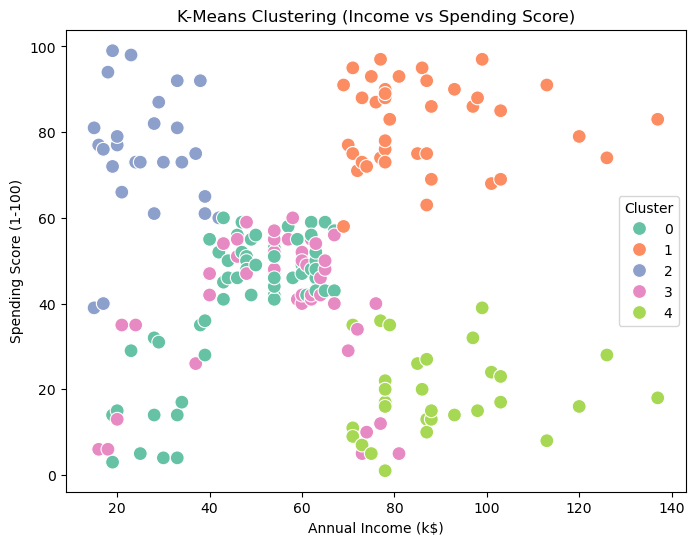

In [77]:
# Create a 2D scatter plot with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100)
plt.title("K-Means Clustering (Income vs Spending Score)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster')
plt.show()

In [78]:
# Calculate Silhouette Score
sil_score = silhouette_score(scaled_features, df_cleaned['Cluster'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.40846873777345605


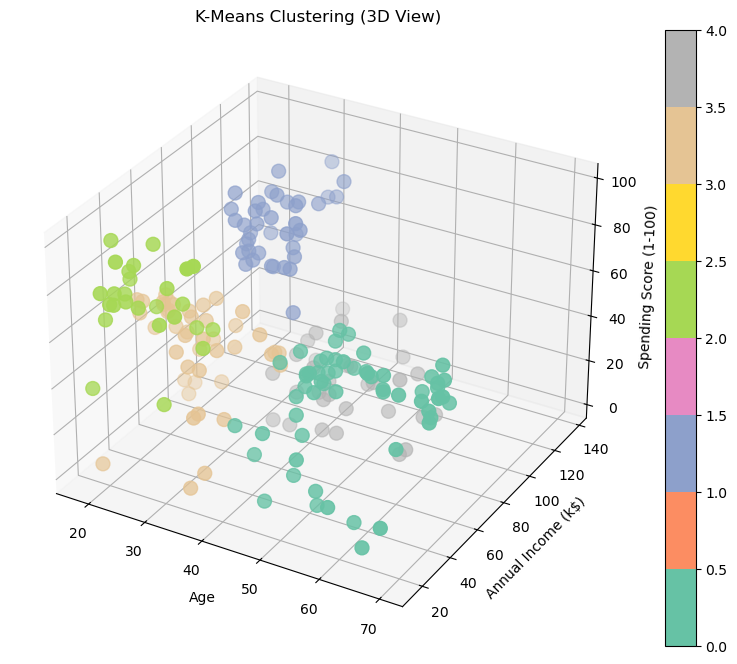

In [79]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with different cluster colors
scatter = ax.scatter(df_cleaned['Age'], df_cleaned['Annual Income (k$)'], df_cleaned['Spending Score (1-100)'], 
                     c=df_cleaned['Cluster'], cmap='Set2', s=100)

# Labels and title
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.set_title("K-Means Clustering (3D View)")

# Add color bar
plt.colorbar(scatter)
plt.show()

In [80]:
# Assuming df_cleaned is your cleaned DataFrame (after handling missing data and duplicates)
df_cleaned = df.dropna().drop_duplicates()

# Select relevant features for clustering
features = df_cleaned[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features (scaling to make each feature contribute equally)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

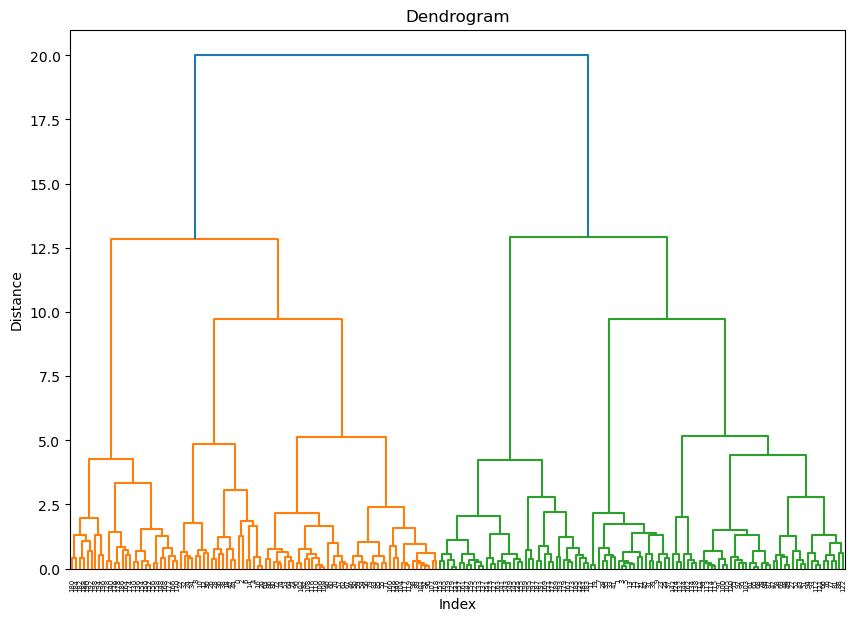

In [81]:
# Create the dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(10, 7))
sch.dendrogram(sch.linkage(scaled_features, method='ward'))  # 'ward' minimizes variance within clusters
plt.title("Dendrogram")
plt.xlabel("Index")
plt.ylabel("Distance")
plt.show()

In [86]:
# Apply Agglomerative Hierarchical Clustering with 5 clusters using the 'ward' linkage (automatically uses Euclidean distance)
hierarchical_clustering = AgglomerativeClustering(n_clusters=5, linkage='ward')

# Assign clusters to the data
df_cleaned['Cluster'] = hierarchical_clustering.fit_predict(scaled_features)

# Show the first few rows with cluster assignments
df_cleaned.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,0
2,3,Female,20,16,6,4
3,4,Female,23,16,77,0
4,5,Female,31,17,40,4


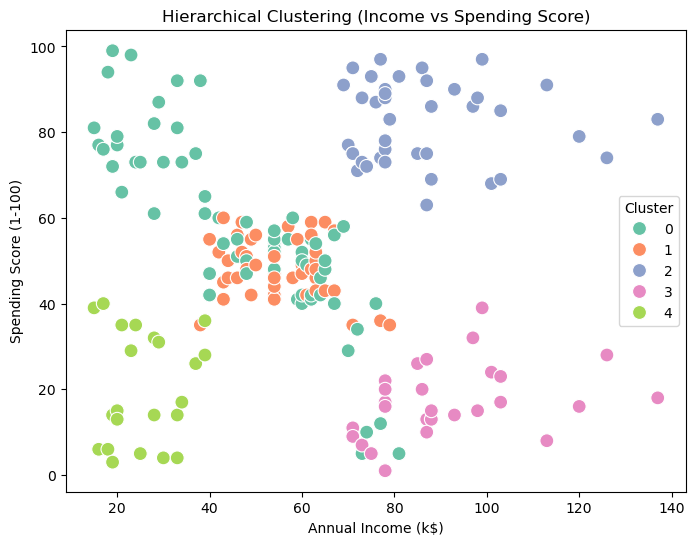

In [83]:
# Create a 2D scatter plot with clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_cleaned, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set2', s=100)
plt.title("Hierarchical Clustering (Income vs Spending Score)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend(title='Cluster')
plt.show()

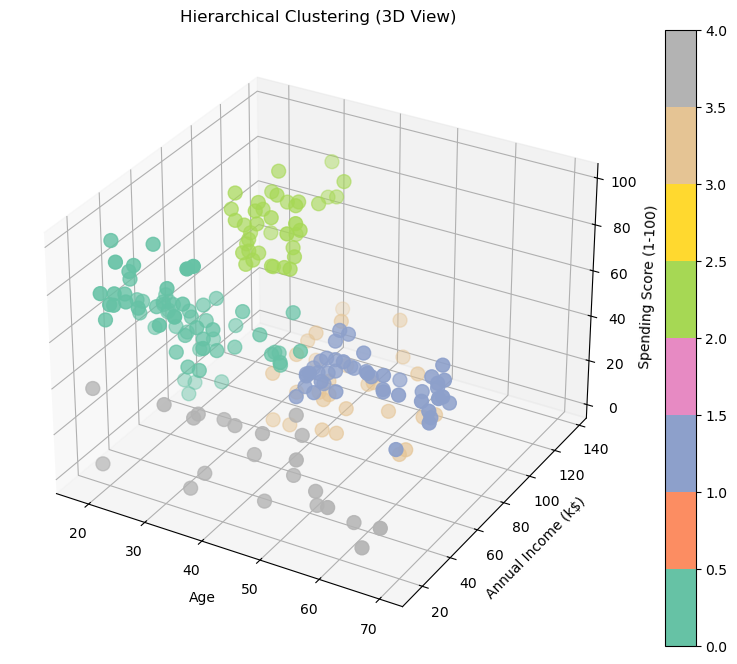

In [84]:
# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points with different cluster colors
scatter = ax.scatter(df_cleaned['Age'], df_cleaned['Annual Income (k$)'], df_cleaned['Spending Score (1-100)'], 
                     c=df_cleaned['Cluster'], cmap='Set2', s=100)

# Labels and title
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.set_title("Hierarchical Clustering (3D View)")

# Add color bar
plt.colorbar(scatter)
plt.show()

In [85]:
# Calculate Silhouette Score
sil_score = silhouette_score(scaled_features, df_cleaned['Cluster'])
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.39002826186267214
